## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

## Chapter-006-004B-Clustering-K-Means-Flower

In [1]:
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

In [2]:
n_colors = 16

# Load the Flower photo

In [3]:
flower = load_sample_image("flower.jpg")

Convert to floats instead of the default 8 bits integer coding. Dividing by
255 is important so that plt.imshow behaves works well on float data (need to
be in the range [0-1])

In [4]:
flower = np.array(flower, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.

In [5]:
# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(flower.shape)
assert d == 3
image_array = np.reshape(flower, (w * h, d))

In [6]:
print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]

kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)

print("Completed in %0.3fs." % (time() - t0))

Fitting model on a small sub-sample of the data
done in 0.276s.


# Get labels for all points

In [7]:
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("Completed in %0.3fs." % (time() - t0))

Predicting color indices on the full image (k-means)
done in 0.149s.


In [8]:
codebook_random = shuffle(image_array, random_state=0)[:n_colors]
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random,
                                          image_array,
                                          axis=0)
print("Completed in %0.3fs." % (time() - t0))

Predicting color indices on the full image (random)
done in 0.145s.


In [9]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Display all results, alongside original image

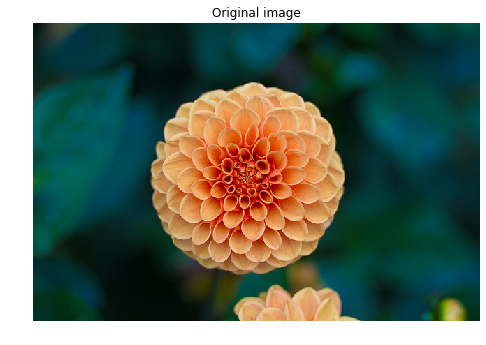

In [10]:
plt.figure(1, figsize=(8, 6))
plt.clf()
plt.axis('off')
plt.title('Original image')
plt.imshow(flower)
plt.show()

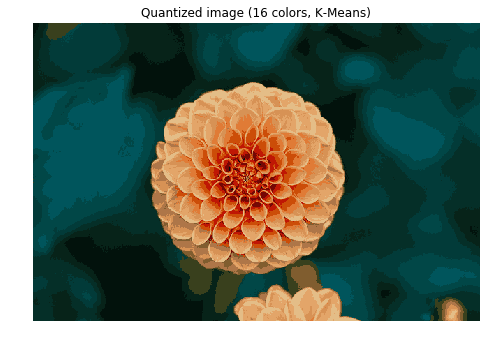

In [11]:
plt.figure(2, figsize=(8, 6))
plt.clf()
plt.axis('off')
plt.title('Quantized image (%d colors, K-Means)' % (n_colors))
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
plt.show()

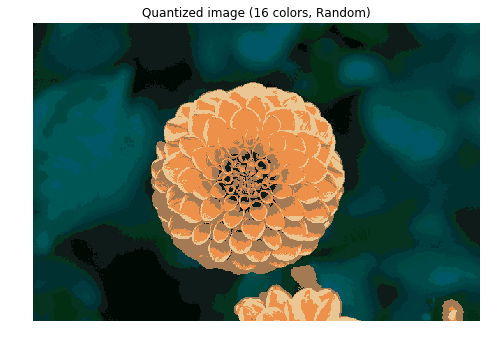

In [12]:
plt.figure(3, figsize=(8, 6))
plt.clf()
plt.axis('off')
plt.title('Quantized image (%d colors, Random)' % (n_colors))
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

## Done

In [13]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-04-20 09:46:11.445938
